<a href="https://colab.research.google.com/github/kathleenreily/high-yield-BofA/blob/master/Copy_of_Timeseries_high_yield_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

1) Plot the time series, along with any logical or necessary differences to get a stationary dataset

2)Generate and interpret a PACF for the time series (and/or its differences)

3) Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

4) Choose one specification and make the case for that as a logical model for your dataset.

In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

HYO_df = pd.read_csv('/content/drive/My Drive/DS projects and datasets/BofA High Yield Index Option.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
HYO_df

,DATE,BAMLH0A0HYM2
0,2015-07-27,5.49
1,2015-07-28,5.44
2,2015-07-29,5.33
3,2015-07-30,5.26
4,2015-07-31,5.36
...,...,...
1318,2020-07-21,5.33
1319,2020-07-22,5.28
1320,2020-07-23,5.26
1321,2020-07-24,5.29


Rename price for readability 

In [ ]:
HYO_df = HYO_df.rename(columns={'BAMLH0A0HYM2': 'PRICE'})

In [ ]:
HYO_df.head()

,DATE,PRICE
0,2015-07-27,5.49
1,2015-07-28,5.44
2,2015-07-29,5.33
3,2015-07-30,5.26
4,2015-07-31,5.36


Convert exchange rate to a number, with coersion to throw NA's if conversion not possible

In [ ]:

HYO_df['PRICE'] = pd.to_numeric(HYO_df.PRICE, errors='coerce')

# Remove NA's
HYO_df.dropna(inplace=True)

As we can see the x axis is not readable, let's create a date index for the bottom

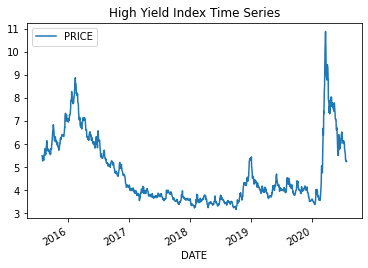

In [ ]:

HYO_df.index = pd.to_datetime(HYO_df.DATE)
HYO_df.plot()
plt.title('High Yield Index Time Series')
plt.show()

1) Create our stationary dataset

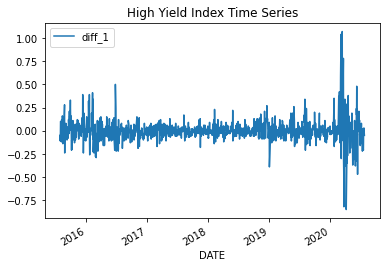

In [ ]:
HYO_df['diff_1'] = HYO_df.PRICE - HYO_df.PRICE.shift()
HYO_df.plot(y='diff_1')
plt.title('High Yield Index Time Series')
plt.show()

2) PACF with differences

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'High Yield Index PACF')

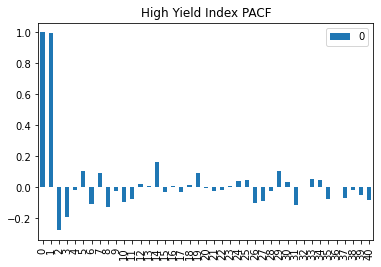

In [ ]:
#initial time series

from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(HYO_df.PRICE))
x_acf.plot(kind='bar')
plt.title("High Yield Index PACF")

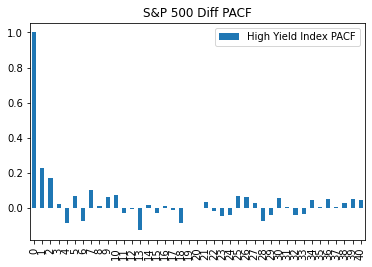

In [ ]:
#differenced time series

x_acf = pd.DataFrame(pacf(HYO_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(["High Yield Index PACF"])

3) Create 5 different ARIMA models with unique specifications

In [ ]:


from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(HYO_df.PRICE, order=(0,1,0)) 
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())



                             ARIMA Model Results                              
Dep. Variable:                D.PRICE   No. Observations:                 1305
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 947.571
Method:                           css   S.D. of innovations              0.117
Date:                Tue, 28 Jul 2020   AIC                          -1891.143
Time:                        15:56:18   BIC                          -1880.795
Sample:                             1   HQIC                         -1887.261
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.003     -0.059      0.953      -0.007       0.006
Residuals Description
count    1.305000e+03
mean     1.381973e-11
std      1.171074e-01
min     -8.498084e-01
25%     -4.980843e-02

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Because we are using a model that is a derviation of ordinary least squares, a higher p val (0.95) is saying the coefficients are strong/very likely, this model is a good possibility

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(HYO_df.PRICE, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())



                              ARMA Model Results                              
Dep. Variable:                  PRICE   No. Observations:                 1306
Model:                     ARMA(2, 0)   Log Likelihood                 982.475
Method:                       css-mle   S.D. of innovations              0.114
Date:                Tue, 28 Jul 2020   AIC                          -1956.951
Time:                        16:34:29   BIC                          -1936.252
Sample:                             0   HQIC                         -1949.186
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8443      0.602      8.046      0.000       3.664       6.024
ar.L1.PRICE     1.2239      0.027     45.467      0.000       1.171       1.277
ar.L2.PRICE    -0.2286      0.027     -8.491    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)



This one has lower AIC, which is better than the first

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(HYO_df.PRICE, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  PRICE   No. Observations:                 1306
Model:                     ARMA(1, 1)   Log Likelihood                 973.085
Method:                       css-mle   S.D. of innovations              0.115
Date:                Tue, 28 Jul 2020   AIC                          -1938.170
Time:                        15:57:15   BIC                          -1917.471
Sample:                             0   HQIC                         -1930.406
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8629      0.639      7.606      0.000       3.610       6.116
ar.L1.PRICE     0.9949      0.002    398.816      0.000       0.990       1.000
ma.L1.PRICE     0.1719      0.024      7.222    

L2 is high 0.99 which is good and the AIC is lower than the last model, which is better, but the p value is still 0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(HYO_df.PRICE, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.PRICE   No. Observations:                 1305
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 995.933
Method:                       css-mle   S.D. of innovations              0.113
Date:                Tue, 28 Jul 2020   AIC                          -1983.867
Time:                        15:57:33   BIC                          -1963.171
Sample:                             1   HQIC                         -1976.103
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.005     -0.053      0.958      -0.010       0.010
ar.L1.D.PRICE     0.6485      0.061     10.595      0.000       0.529       0.769
ma.L1.D.PRICE    -0.4375      0.071     

Our error score is -0.43 so accounts for no errors, AIC is too high compared to the last one, and the price yesterday moderately determines today's price...not the best model perameters 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(HYO_df.PRICE, order=(2,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.PRICE   No. Observations:                 1305
Model:                 ARIMA(2, 1, 5)   Log Likelihood                1024.597
Method:                       css-mle   S.D. of innovations              0.110
Date:                Tue, 28 Jul 2020   AIC                          -2031.194
Time:                        16:48:22   BIC                          -1984.628
Sample:                             1   HQIC                         -2013.725
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.005     -0.053      0.958      -0.009       0.009
ar.L1.D.PRICE    -1.6523      0.035    -47.075      0.000      -1.721      -1.583
ar.L2.D.PRICE    -0.9094      0.038    -

This is the best performing model so far the price two days ago is more reflected in todays price then the one yesterday, the p vals are 0 the errors are largely accounted for. 

I am choosing this model for the reasons stated above

5) Choose the best model specification and provide rational:

The lower AIC (-2031, furthest away from 0) the better so this is the best performing model so far
the price two days ago is more reflected in todays price then the one yesterday, the p vals are 0
the errors are largely accounted for. 

I am choosing the last model perameters 2,1,5 for the reasons stated above